Importing the basic dependencies

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Importing the Dataset

In [ ]:
dataset = pd.read_excel('/content/Heat Flow for Machine Learning.xlsx')

In [ ]:
dataset

,Type of PCM,Concentration of PCM (Wt.%),Concentraton of biochar(Wt.%),Concentration of MWCNT(Wt.%),Heating rate (°C/min),Temperature(°C),Heat Flow (mW/mg)
0,Pure PCM,100.0,0,0.0,5.0,9.803695,3.289101
1,Pure PCM,100.0,0,0.0,5.0,9.644549,3.289108
2,Pure PCM,100.0,0,0.0,5.0,9.511142,3.289119
3,Pure PCM,100.0,0,0.0,5.0,9.400537,3.289126
4,Pure PCM,100.0,0,0.0,5.0,9.309975,3.289137
...,...,...,...,...,...,...,...
14298,PCM Char 24 1 CNT,75.0,24,1.0,10.0,56.493496,3.599134
14299,PCM Char 24 1 CNT,75.0,24,1.0,10.0,56.663461,3.599469
14300,PCM Char 24 1 CNT,75.0,24,1.0,10.0,56.823427,3.599792
14301,PCM Char 24 1 CNT,75.0,24,1.0,10.0,56.993397,3.600082


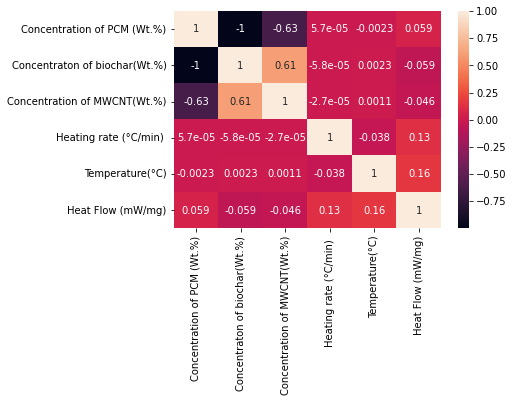

In [ ]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

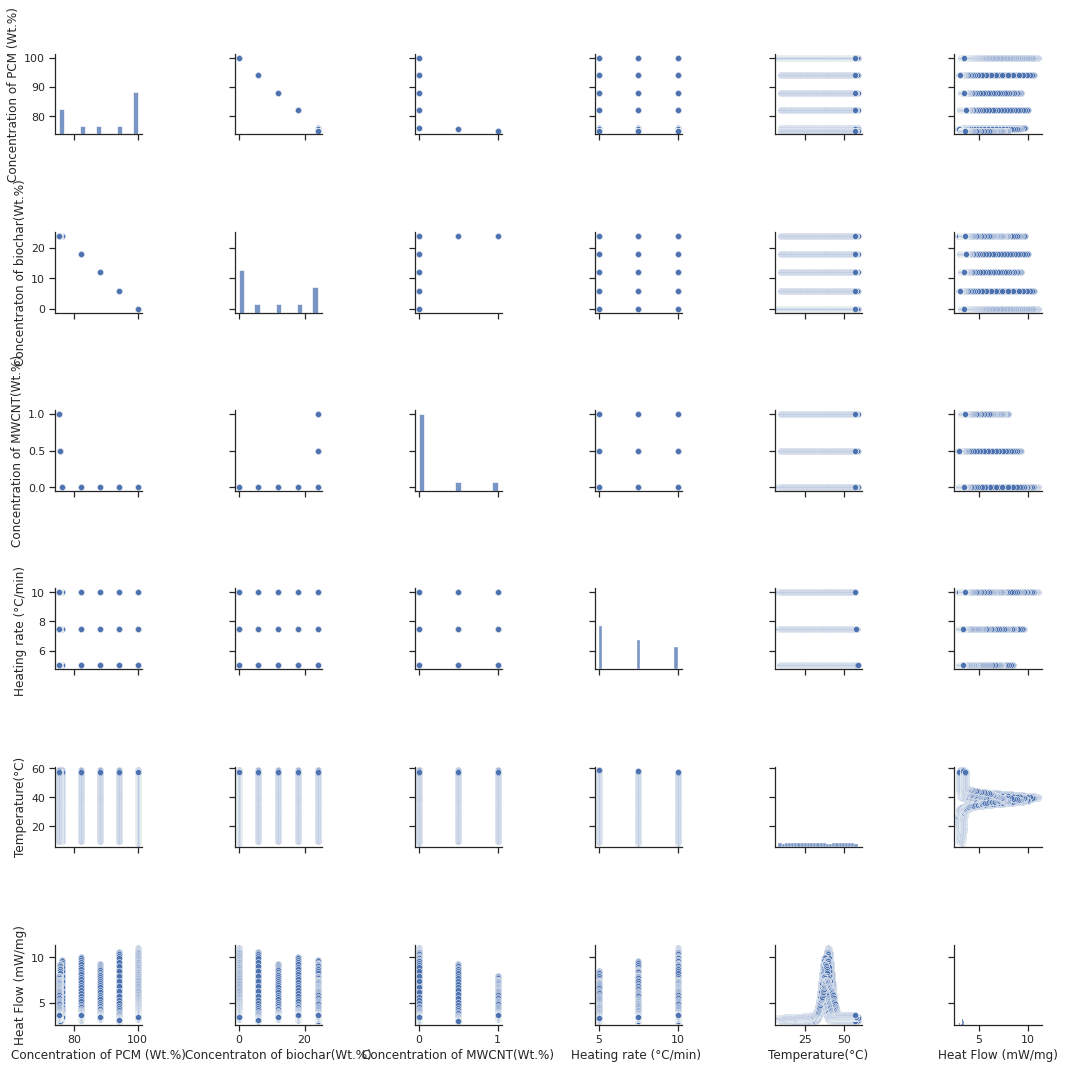

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)
plt.show()

In [ ]:
x=dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

Splitting the Dataset into training set & test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [ ]:
x_train[0]

array([100.      ,   0.      ,   0.      ,  10.      ,  50.211764])

Feature Scaling on independent variable

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train[:,:])
x_test = sc_x.transform(x_test[:,:])

In [ ]:
x_train

array([[ 0.94119876, -0.94543248, -0.44281907,  1.53680124,  1.18337026],
       [ 0.94119876, -0.94543248, -0.44281907,  0.28647993,  0.22433324],
       [ 0.94119876, -0.94543248, -0.44281907, -0.96384138, -0.01426876],
       ...,
       [-0.77110478,  0.79874846, -0.44281907,  0.28647993, -0.51215421],
       [-1.34187262,  1.38014211, -0.44281907, -0.96384138,  0.59217808],
       [ 0.94119876, -0.94543248, -0.44281907, -0.96384138,  1.4551877 ]])

Feature Scaling on dependent variable

Reshaping the Dependent Variable

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type of PCM                    14303 non-null  object 
 1   Concentration of PCM (Wt.%)    14303 non-null  float64
 2   Concentraton of biochar(Wt.%)  14303 non-null  int64  
 3   Concentration of MWCNT(Wt.%)   14303 non-null  float64
 4   Heating rate (°C/min)          14303 non-null  float64
 5   Temperature(°C)                14303 non-null  float64
 6   Heat Flow (mW/mg)              14303 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 782.3+ KB


# Model Building

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 9)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg_2.predict(x_poly_test)

In [ ]:
y_pred = y_pred.reshape(len(y_pred),1)

In [ ]:
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

In [ ]:
y_test1

array([[4.87587308],
       [8.66328123],
       [3.38673793],
       ...,
       [3.43430555],
       [3.17289407],
       [2.95639204]])

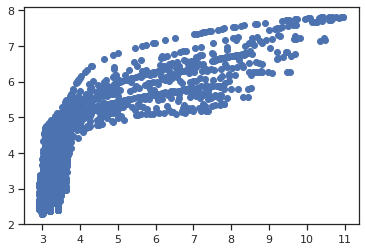

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.7229510300547131
0.7050590128692198


In [ ]:
PLR_ytest = y_test1
PLR_ypred = y_pred1

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
y_pred = y_pred.reshape(len(y_pred),1)

In [ ]:
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)
x_test1 = sc_x.inverse_transform(x_test)

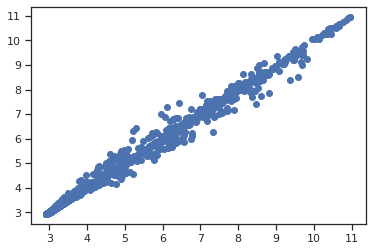

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.9943836403078071
0.10038634811240786


In [ ]:
RFR_ytest = y_test1
RFR_ypred = y_pred1
RFR_xtest = x_test1

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

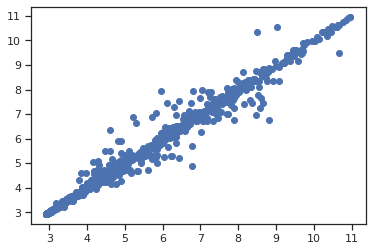

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.9892898771201496
0.1386259149330675


In [ ]:
DTR_ytest = y_test1
DTR_ypred = y_pred1
DTR_xtest = x_test1

K-NN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=11)
regressor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

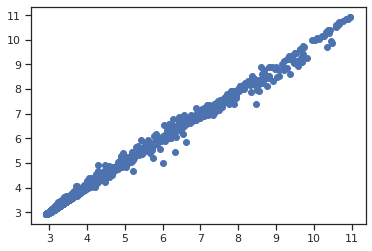

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.9970003807229759
0.07336353789713974


In [ ]:
kNNR_ytest = y_test1
kNNR_ypred = y_pred1
kNNR_xtest = x_test1

SVM Regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(epsilon = 0.5)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.5)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

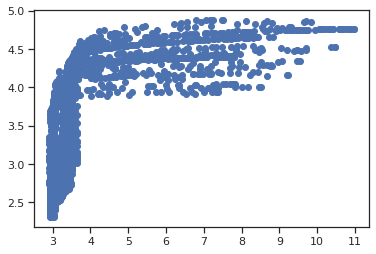

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.2884256320041634
1.129945108833331


In [ ]:
SVR_ytest = y_test1
SVR_ypred = y_pred1
SVR_xtest = x_test1

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

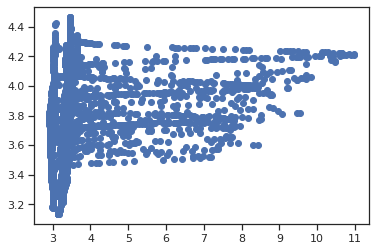

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.05376861816210177
1.3030043704128746


In [ ]:
LR_ytest = y_test1
LR_ypred = y_pred1
LR_xtest = x_test1

XGBoost

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train,y_train)

[18:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

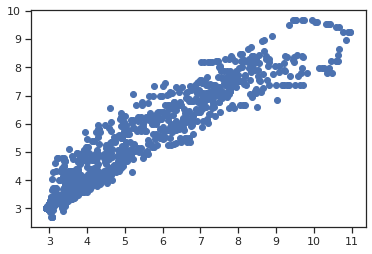

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.9371090977126004
0.3359240606957013


In [ ]:
XGR_ytest = y_test1
XGR_ypred = y_pred1
XGR_xtest = x_test1

CAT Boost - Bidirectional LSTM Neural Network

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(x_train,y_train)

Learning rate set to 0.05892
0:	learn: 0.9541742	total: 49.4ms	remaining: 49.4s
1:	learn: 0.9104566	total: 52.3ms	remaining: 26.1s
2:	learn: 0.8694001	total: 54.7ms	remaining: 18.2s
3:	learn: 0.8315798	total: 57.3ms	remaining: 14.3s
4:	learn: 0.7945433	total: 59.9ms	remaining: 11.9s
5:	learn: 0.7597430	total: 62.4ms	remaining: 10.3s
6:	learn: 0.7279100	total: 64.8ms	remaining: 9.2s
7:	learn: 0.6961324	total: 67.3ms	remaining: 8.34s
8:	learn: 0.6665214	total: 69.8ms	remaining: 7.68s
9:	learn: 0.6384134	total: 72.3ms	remaining: 7.16s
10:	learn: 0.6130209	total: 74.8ms	remaining: 6.72s
11:	learn: 0.5866488	total: 77.2ms	remaining: 6.36s
12:	learn: 0.5622894	total: 79.6ms	remaining: 6.05s
13:	learn: 0.5422980	total: 82ms	remaining: 5.78s
14:	learn: 0.5207278	total: 84.4ms	remaining: 5.54s
15:	learn: 0.5011488	total: 86.9ms	remaining: 5.34s
16:	learn: 0.4816017	total: 89.4ms	remaining: 5.17s
17:	learn: 0.4633525	total: 91.9ms	remaining: 5.01s
18:	learn: 0.4464762	total: 94.3ms	remaining: 4.

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = y_pred.reshape(len(y_pred),1)
y_pred1 = sc_y.inverse_transform(y_pred)
y_test1 = sc_y.inverse_transform(y_test)

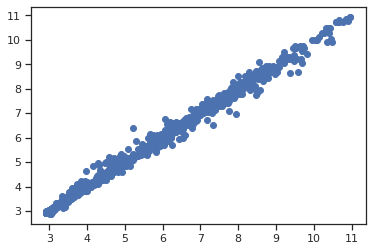

In [ ]:
plt.scatter(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
print(r2_score(y_test1, y_pred1))
mse=mean_squared_error(y_test1,y_pred1)
rsme=sqrt(mse)
print(rsme)

0.9962537152813846
0.08198748965218428


In [ ]:
CBR_ytest = y_test1
CBR_ypred = y_pred1
CBR_xtest = x_test1

# Result Dataframe

In [ ]:
df = pd.DataFrame()

In [ ]:
x_test1

array([[100.      ,   0.      ,   0.      ,   5.      ,  34.884295],
       [ 75.5     ,  24.      ,   0.5     ,  10.      ,  37.08853 ],
       [ 76.      ,  24.      ,   0.      ,   7.5     ,  45.761293],
       ...,
       [ 82.      ,  18.      ,   0.      ,   5.      ,  54.233841],
       [ 94.      ,   6.      ,   0.      ,   7.5     ,  42.391707],
       [ 75.5     ,  24.      ,   0.5     ,  10.      ,  12.045519]])

In [ ]:
heating_rate = x_test1[:,-2]
temperature = x_test1[:,-1]
PCM_conc = x_test1[:,0]
char = x_test1[:,1]
CNT = x_test1[:,2]


In [ ]:
df['Concentration of PCM (Wt.%)'] = PCM_conc
df['Concentraton of biochar(Wt.%)'] = char
df['Concentration of MWCNT(Wt.%)'] = CNT
df['heating_rate'] = heating_rate
df['temperature'] = temperature

df["RFR_ytest"] = RFR_ytest
df["RFR_ypred"] = RFR_ypred
df["DTR_ytest"] = DTR_ytest
df["DTR_ypred"] = DTR_ypred
df["kNNR_ytest"] = kNNR_ytest
df["kNNR_ypred"] = kNNR_ypred
df["SVR_ytest"] = SVR_ytest
df["SVR_ypred"] = SVR_ypred
df["LR_ytest"] = LR_ytest
df["LR_ypred"] = LR_ypred
df["XGR_ytest"] = XGR_ytest
df["XGR_ypred"] = XGR_ypred
df["CBR_ytest"] = CBR_ytest
df["CBR_ypred"] = CBR_ypred


In [ ]:
df_sorted = df.sort_values(['heating_rate','temperature'], ascending=True)

In [ ]:
df_sorted

,Concentration of PCM (Wt.%),Concentraton of biochar(Wt.%),Concentration of MWCNT(Wt.%),heating_rate,temperature,RFR_ytest,RFR_ypred,DTR_ytest,DTR_ypred,kNNR_ytest,kNNR_ypred,SVR_ytest,SVR_ypred,LR_ytest,LR_ypred,XGR_ytest,XGR_ypred,CBR_ytest,CBR_ypred
1682,100.0,0.0,0.0,5.0,9.025018,3.289192,3.289200,3.289192,3.289200,3.289192,3.289200,3.289192,2.926319,3.289192,3.358344,3.289192,3.300775,3.289192,3.289490
1067,100.0,0.0,0.0,5.0,9.025136,3.289192,3.289194,3.289192,3.289192,3.289192,3.289198,3.289192,2.926309,3.289192,3.358346,3.289192,3.300775,3.289192,3.289490
2219,100.0,0.0,0.0,5.0,9.026917,3.289192,3.289193,3.289192,3.289192,3.289192,3.289196,3.289192,2.926156,3.289192,3.358372,3.289192,3.300775,3.289192,3.289490
3820,100.0,0.0,0.0,5.0,9.034631,3.289184,3.289156,3.289184,3.289136,3.289184,3.289187,3.289184,2.925494,3.289184,3.358485,3.289184,3.300775,3.289184,3.289490
1942,100.0,0.0,0.0,5.0,9.045030,3.289067,3.289174,3.289067,3.289184,3.289067,3.289185,3.289067,2.924602,3.289067,3.358638,3.289067,3.300775,3.289067,3.287282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,100.0,0.0,0.0,10.0,57.110733,3.470911,3.470842,3.470911,3.470812,3.470911,3.470413,3.470911,2.787493,3.470911,4.464935,3.470911,3.620474,3.470911,3.466243
2375,75.0,24.0,1.0,10.0,57.163366,3.600376,3.599474,3.600376,3.599792,3.600376,3.596839,3.600376,3.247848,3.600376,4.227600,3.600376,3.670024,3.600376,3.593153
1957,100.0,0.0,0.0,10.0,57.180713,3.471105,3.470919,3.471105,3.471010,3.471105,3.470413,3.471105,2.777363,3.471105,4.465961,3.471105,3.620474,3.471105,3.466243
67,88.0,12.0,0.0,10.0,57.181545,3.472088,3.470793,3.472088,3.471200,3.472088,3.468209,3.472088,2.728135,3.472088,4.387834,3.472088,3.518759,3.472088,3.487069


Convert to Excel

In [ ]:
file_name = 'Heat Flow.xlsx'

In [ ]:
df_sorted.to_excel(file_name)